In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [2]:
# print(results.head())
# plot simulation data results
dgp_list = ['linear', 'single_index', 'trig_poly', 'max']
method_names = ['XBART','XBART-GP','Jackknife+ XBART','Jackknife+ RF','CV+ XBART', 'CV+ RF']
ntrial = 10

results = pd.read_csv('xbart_gp_sim.csv')
plt.rcParams.update({'font.size': 14})
num_funs=2
coverage_type = ['Interior', 'Exterior']
results = results[results['coverage_type']!='Overall']

results['method'][results['method']=='jackknife+ XBART'] = 'Jackknife+ XBART'
results['method'][results['method']=='jackknife+ RF'] = 'Jackknife+ RF'

/var/folders/01/l9rwq0097m9dz413l3qd0lxm0000gp/T/ipykernel_96405/2110040316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['method'][results['method']=='jackknife+ RF'] = 'Jackknife+ RF'


In [3]:
df = results.groupby(['dgp', 'method', 'coverage_type'], sort =False).mean().round(3)
df = df.reset_index()
df.drop(['itrial','size'],axis=1, inplace=True)
df = df.pivot(index=['dgp', 'method'],columns='coverage_type')
df = df[[('rmse', 'Interior'), ('rmse', 'Exterior'), \
         ('coverage', 'Interior'), ('coverage', 'Exterior'), \
        ('width', 'Interior'), ('width', 'Exterior')]]
df = df.sort_index(level = 0, ascending =False)
df.to_csv('sort_results.csv')
df.head()

rmse          coverage             width  \
coverage_type              Interior Exterior Interior Exterior Interior   
dgp       method                                                          
trig_poly XBART-GP            4.229    8.549    0.839    0.705   11.441   
          XBART               4.591    9.805    0.798    0.615   11.007   
          Jackknife+ XBART    4.577    9.845    0.789    0.567   10.054   
          Jackknife+ RF       5.719   11.110    0.785    0.584   13.650   
          CV+ XBART           4.595    9.904    0.791    0.579   10.334   

                                     
coverage_type              Exterior  
dgp       method                     
trig_poly XBART-GP           13.322  
          XBART              11.718  
          Jackknife+ XBART   10.115  
          Jackknife+ RF      13.764  
          CV+ XBART          10.470

linear


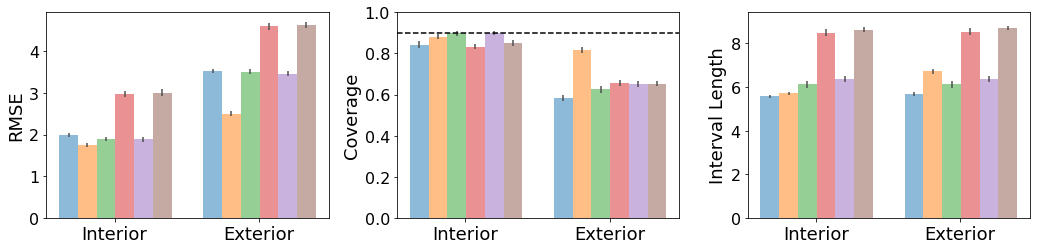

single_index


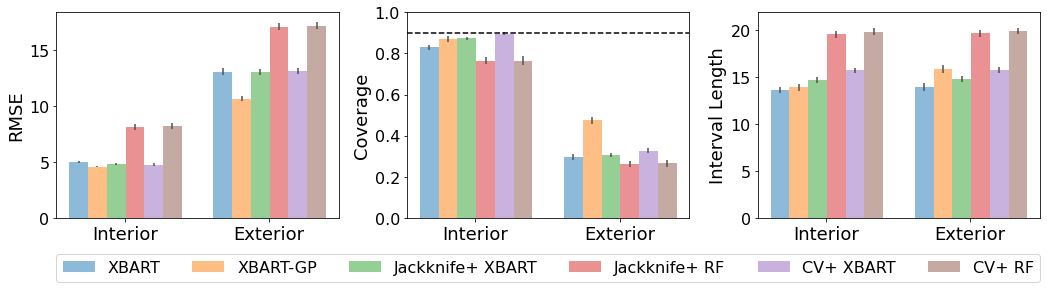

In [4]:
dgp_list = ['linear', 'single_index']#, 'trig_poly', 'max']
for dgp in dgp_list: 
    print(dgp)
    fig, axes = plt.subplots(1, 3, sharey=False, figsize=(15,4))
    fig.tight_layout(pad = 2)
    for method in method_names:
        rmse_mean = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['rmse'].mean().reindex(coverage_type)
        rmse_SE = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['rmse'].std().reindex(coverage_type)\
                        /np.sqrt(ntrial)
        axes[0].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                rmse_mean,0.13,alpha=0.5,\
           yerr = rmse_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[0])
    plt.ylabel('RMSE', size = 18)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    plt.yticks(size=16)

    for method in method_names:
        coverage_mean = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['coverage'].mean().reindex(coverage_type)
        coverage_SE = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['coverage'].std().reindex(coverage_type)\
                        /np.sqrt(ntrial)
        axes[1].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                coverage_mean,0.13,alpha=0.5,\
           yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[1])
    plt.ylabel('Coverage', size = 18)
    plt.ylim([0,1])
    plt.yticks(size=16)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    plt.axhline(0.9,linestyle='dashed',color='black')

    for method in method_names:
        width_mean = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('coverage_type')['width'].mean().reindex(coverage_type)
        width_SE = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('coverage_type')['width'].std().reindex(coverage_type)/np.sqrt(ntrial)
        axes[2].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                width_mean,0.13,alpha=0.5,\
           yerr = width_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[2])
    plt.ylim([0, results[(results['dgp']==dgp)]['width'].max()])
    plt.ylabel('Interval Length', size = 18)
    plt.yticks(size=16)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    if dgp == dgp_list[-1]:
        plt.sca(axes[1])
        legend = plt.legend(loc="lower center", ncol = len(method_names), bbox_to_anchor=(0.5, -0.35), fontsize=16)
    plt.show()
    fig.savefig('jackknife_'+dgp+'.pdf', dpi="figure", bbox_inches='tight')

trig_poly


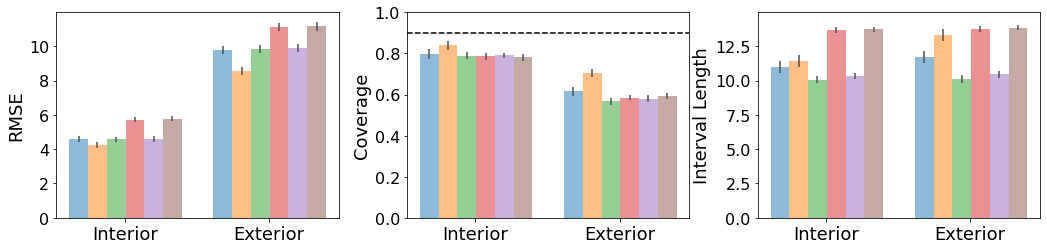

max


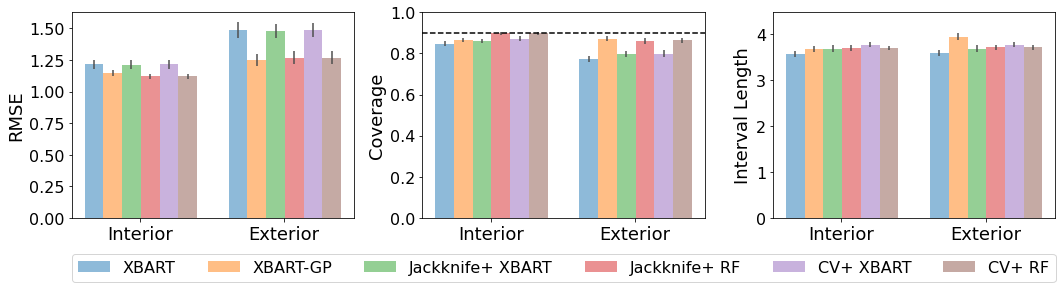

In [5]:
dgp_list = ['trig_poly', 'max']
for dgp in dgp_list: 
    print(dgp)
    fig, axes = plt.subplots(1, 3, sharey=False, figsize=(15,4))
    fig.tight_layout(pad = 2)
    for method in method_names:
        rmse_mean = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['rmse'].mean().reindex(coverage_type)
        rmse_SE = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['rmse'].std().reindex(coverage_type)\
                        /np.sqrt(ntrial)
        axes[0].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                rmse_mean,0.13,alpha=0.5,\
           yerr = rmse_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[0])
    plt.ylabel('RMSE', size = 18)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    plt.yticks(size=16)

    for method in method_names:
        coverage_mean = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['coverage'].mean().reindex(coverage_type)
        coverage_SE = results[(results['dgp']==dgp)&\
                    (results['method']==method)].groupby('coverage_type')['coverage'].std().reindex(coverage_type)\
                        /np.sqrt(ntrial)
        axes[1].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                coverage_mean,0.13,alpha=0.5,\
           yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[1])
    plt.ylabel('Coverage', size = 18)
    plt.ylim([0,1])
    plt.yticks(size=16)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    plt.axhline(0.9,linestyle='dashed',color='black')

    for method in method_names:
        width_mean = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('coverage_type')['width'].mean().reindex(coverage_type)
        width_SE = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('coverage_type')['width'].std().reindex(coverage_type)/np.sqrt(ntrial)
        axes[2].bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                width_mean,0.13,alpha=0.5,\
           yerr = width_SE,error_kw={'ecolor': '0.3'},label=method)
    plt.sca(axes[2])
    plt.ylim([0, results[(results['dgp']==dgp)]['width'].max()])
    plt.ylabel('Interval Length', size = 18)
    plt.yticks(size=16)
    plt.xticks(np.arange(num_funs),coverage_type, size = 18)
    if dgp == dgp_list[-1]:
        plt.sca(axes[1])
        legend = plt.legend(loc="lower center", ncol = len(method_names), bbox_to_anchor=(0.5, -0.35), fontsize=16)
    plt.show()
    fig.savefig('jackknife_'+dgp+'.pdf', dpi="figure", bbox_inches='tight')

In [6]:

# for dgp in dgp_list: 
#     print(dgp)
#     for method in method_names:
#         rmse_mean = results[(results['dgp']==dgp)&\
#                     (results['method']==method)].groupby('coverage_type')['rmse'].mean().reindex(coverage_type)
#         rmse_SE = results[(results['dgp']==dgp)&\
#                     (results['method']==method)].groupby('coverage_type')['rmse'].std().reindex(coverage_type)\
#                         /np.sqrt(ntrial)
#         plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
#                 rmse_mean,0.13,alpha=0.5,\
#            yerr = rmse_SE,error_kw={'ecolor': '0.3'},label=method)
#     plt.ylabel('RMSE', size = 20)
# #     plt.ylim([0,1])
#     plt.xticks(np.arange(num_funs),coverage_type, size = 20)
#     plt.yticks(size=16)
# #     plt.axhline(0.9,linestyle='dashed',color='black')
#     plt.savefig('jackknife_'+dgp+'_rmse.png',dpi=400,bbox_inches='tight')
#     plt.show()
    
#     for method in method_names:
#         coverage_mean = results[(results['dgp']==dgp)&\
#                     (results['method']==method)].groupby('coverage_type')['coverage'].mean().reindex(coverage_type)
#         coverage_SE = results[(results['dgp']==dgp)&\
#                     (results['method']==method)].groupby('coverage_type')['coverage'].std().reindex(coverage_type)\
#                         /np.sqrt(ntrial)
#         plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
#                 coverage_mean,0.13,alpha=0.5,\
#            yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method)
#     plt.ylabel('Coverage', size = 20)
#     plt.ylim([0,1])
#     plt.yticks(size=16)
#     plt.xticks(np.arange(num_funs),coverage_type, size = 20)
#     plt.axhline(0.9,linestyle='dashed',color='black')
#     plt.savefig('jackknife_'+dgp+'_coverage.png',dpi=400,bbox_inches='tight')
#     plt.show()

#     for method in method_names:
#         width_mean = results[(results['dgp']==dgp)&\
#             (results['method']==method)].groupby('coverage_type')['width'].mean().reindex(coverage_type)
#         width_SE = results[(results['dgp']==dgp)&\
#             (results['method']==method)].groupby('coverage_type')['width'].std().reindex(coverage_type)/np.sqrt(ntrial)
#         plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
#                 width_mean,0.13,alpha=0.5,\
#            yerr = width_SE,error_kw={'ecolor': '0.3'},label=method)
#         plt.ylim([0, results[(results['dgp']==dgp)]['width'].max()])
#     plt.ylabel('Interval Length', size = 20)
#     plt.yticks(size=16)
#     plt.xticks(np.arange(num_funs),coverage_type, size = 20)
#     plt.savefig('jackknife_'+dgp+'_width.png',dpi=400,bbox_inches='tight')
#     plt.show()




In [7]:
    
# # plot legend
# for method in method_names:
#     coverage_mean = results[(results['dgp']==dgp)&\
#                 (results['method']==method)].groupby('coverage_type')['coverage'].mean().reindex(coverage_type)
#     coverage_SE = results[(results['dgp']==dgp)&\
#                 (results['method']==method)].groupby('coverage_type')['coverage'].std().reindex(coverage_type)\
#                     /np.sqrt(ntrial)
#     plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
#             coverage_mean,0.13,alpha=0.5,\
#        yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method)
# # plt.ylabel('Coverage')
# # plt.ylim([0,1])
# # plt.xticks(np.arange(num_funs),coverage_type_rename)
# # plt.axhline(0.9,linestyle='dashed',color='black')
# legend = plt.legend(loc=(1.04,0), ncol = len(method_names))
# fig  = legend.figure
# fig.canvas.draw()
# bbox  = legend.get_window_extent()
# bbox = bbox.from_extents(*(bbox.extents + np.array([-5,-5,5,5])))
# bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
# fig.savefig("legend.png", dpi="figure", bbox_inches=bbox)